In [1]:
import os,sys,string, time
import ROOT
from math import *
from ROOT import gPad, TTree, TObject, TFile, gDirectory, TH1D, TH2D, TH3D, TCanvas, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain, TLatex, TText, TCollection, kRed, kBlue
from array import array
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
from matplotlib.patches import Rectangle
import xgboost
from xgboost import XGBClassifier
import joblib

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Var_list

print ('Success')



Welcome to JupyROOT 6.24/06
Success


## Reading .csv list

In [2]:
def Pandafy(path):
    cols = ['Mass','Value']
    df = pd.read_csv(path,names=cols)
    firstLine = pd.DataFrame([[df['Mass'][0],1.]],columns=cols)
    lastLine = pd.DataFrame([[df['Mass'][-1:].values[0],1.]],columns=cols)
    df = pd.concat([firstLine,df])
    df = pd.concat([df,lastLine])
    return df

## Reading in files

In [3]:
uboone = Pandafy('limit_files/stats_only_expected_mu_run1_test.csv')
uboone_r3 = Pandafy('limit_files/stats_only_expected_mu_run3_test.csv')
uboone_combined = Pandafy('limit_files/stats_only_expected_mu_COMBINED_test.csv')
uboone_half_stats = Pandafy('limit_files/Stats_only_havled_expected_mu_COMBINED_with_sig.csv')
uboone_highest_E = Pandafy('limit_files/Stats_only_havled_expected_mu_COMBINED_highest_E_2.csv')
uboone_sys = Pandafy('limit_files/Owen_sys_havled_expected_mu_COMBINED_highest_E_3.csv')
uboone_sys_toys = Pandafy('limit_files/Owen_sys_havled_expected_mu_COMBINED_highest_E_toys_1.csv')
uboone_logit = Pandafy('limit_files/Flat_sys_havled_expected_mu_COMBINED_highest_E_toys_logit_1.csv')

uboone_Stefan = Pandafy('limit_files/COMBINED_logit_for_Stefan.csv')
uboone_NEW = Pandafy('limit_files/New_BR_expected_mu.csv')

uboone_top_20 = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen.csv')

PIENU = Pandafy('limit_files/PIENU_2019.csv')
PS191 = Pandafy('limit_files/PS191_1988.csv')
KEK = Pandafy('limit_files/KEK.csv')
E949 = Pandafy('limit_files/E949_2015.csv')

Theorist_Pawels = Pandafy('limit_files/Reinterp_Pawels_result.csv')

point = [150,4.26974152748967e-07]
# ub_Davide = Pandafy('Data/mu_UBOONE_Porzio_maj.csv')
# sbnd = Pandafy('Data/mu_sbnd_DM.csv')
# sbnd_bkg = Pandafy('Data/mu_sbnd_bkg_DM.csv')
# sbnd_bkg_err = Pandafy('Data/mu_sbnd_bkg_err_DM.csv')
# icarus = Pandafy('Data/mu_icarus_DM.csv')
# NA62 = Pandafy('Data/mu_NA62_ICHEP2020.csv')
# NA62_OLD = Pandafy('Data/mu_NA62.csv')
# nutev = Pandafy('Data/mu_nutev.csv')
# t2k = Pandafy('Data/T2K_mu_single.csv')
# ps191 = Pandafy('Data/mu_PS191_better.csv')
# e949 = Pandafy('Data/mu_BNL_E949.csv')
# PIENU = Pandafy('Data/mu_PIENU1.csv')
# PIENU2 = Pandafy('Data/mu_PIENU2.csv')


## Plotting limits

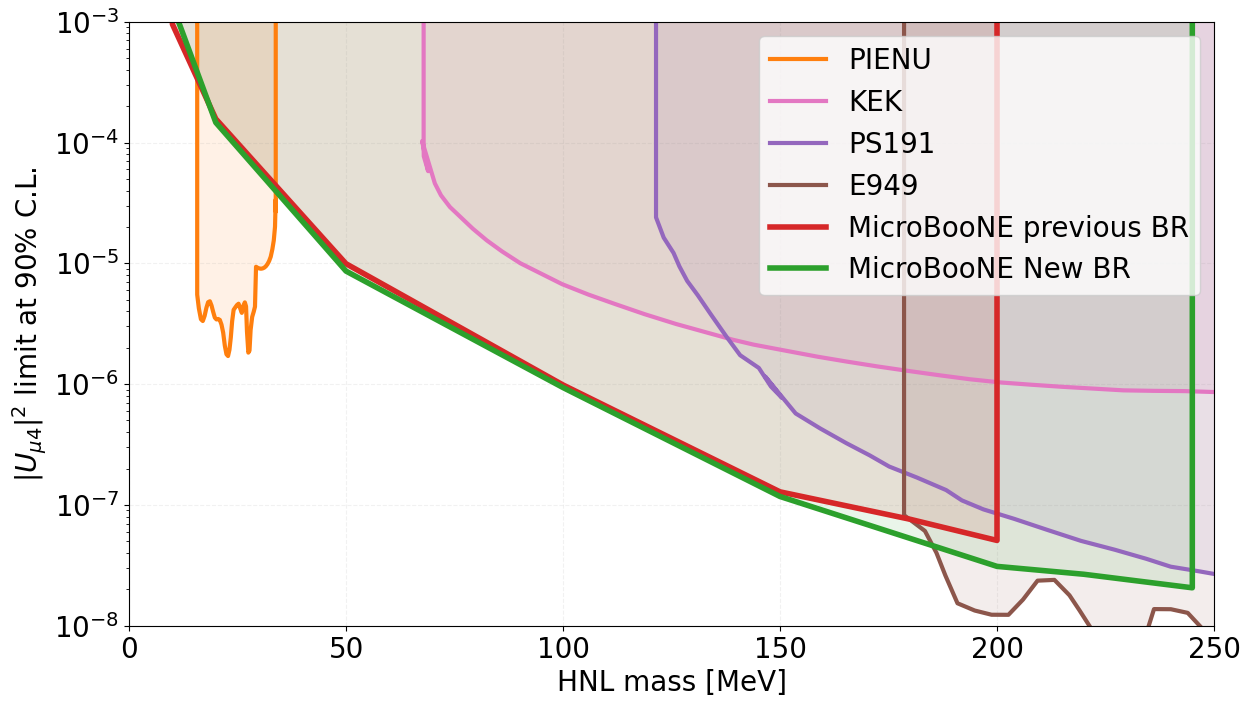

In [8]:
style_ps = '-'
style_ds = '-'
transp = 0.05



plt.figure(figsize=(14,8),facecolor='white',dpi=100)

#Could loop over a dict (saved in constants) of other relevant limits

# plt.plot(ps191['Mass'],ps191['Value'],label="PS191",color="C8",lw=4)
# plt.fill_between(ps191['Mass'],ps191['Value'],1,color="C8",alpha=0.1)
# plt.plot(NA62['Mass'],NA62['Value'],label="NA62",color="C2",lw=4)
# plt.fill_between(NA62['Mass'],NA62['Value'],1,color="C2",alpha=0.1)
# plt.plot(NA62_OLD['Mass'],NA62_OLD['Value'],label="NA62_OLD",color="C3",lw=4)
# plt.fill_between(NA62_OLD['Mass'],NA62_OLD['Value'],1,color="C3",alpha=0.1)
# plt.plot(PIENU['Mass'],PIENU['Value'],label="PIENU",color="C4",lw=4)
# plt.fill_between(PIENU['Mass'],PIENU['Value'],1,color="C4",alpha=0.1)
# plt.plot(PIENU2['Mass'],PIENU2['Value'],label="PIENU2",color="C5",lw=4)
# plt.fill_between(PIENU2['Mass'],PIENU2['Value'],1,color="C5",alpha=0.1)

# plt.plot(e949['Mass'],e949['Value'],label="E949",color="C9",lw=4)
# plt.fill_between(e949['Mass'],e949['Value'],1,color="C9",alpha=0.1)
# plt.plot(t2k['Mass'],t2k['Value'],label="T2K",color="C7",lw=4)
# plt.fill_between(t2k['Mass'],t2k['Value'],1,color="C7",alpha=0.1)

# plt.plot(uboone['Mass'],uboone['Value'],label="Run1 stats only",color="C6",lw=5)
# plt.fill_between(uboone['Mass'],uboone['Value'],1,color="C6",alpha=0.1)

# plt.plot(uboone_r3['Mass'],uboone_r3['Value'],label="Run3 stats only",color="C8",lw=5)
# plt.fill_between(uboone_r3['Mass'],uboone_r3['Value'],1,color="C8",alpha=0.1)

plt.plot(PIENU['Mass'],PIENU['Value'],label="PIENU",color="C1",lw=3)
plt.fill_between(PIENU['Mass'],PIENU['Value'],1,color="C1",alpha=0.1)

plt.plot(KEK['Mass'],KEK['Value'],label="KEK",color="C6",lw=3)
plt.fill_between(KEK['Mass'],KEK['Value'],1,color="C6",alpha=0.1)

plt.plot(PS191['Mass'],PS191['Value'],label="PS191",color="C4",lw=3)
plt.fill_between(PS191['Mass'],PS191['Value'],1,color="C4",alpha=0.1)

plt.plot(E949['Mass'],E949['Value'],label="E949",color="C5",lw=3)
plt.fill_between(E949['Mass'],E949['Value'],1,color="C5",alpha=0.1)

# plt.plot(Theorist_Pawels['Mass'],Theorist_Pawels['Value'],label="Theorist recast",color="black",lw=3)
#plt.fill_between(Theorist_Pawels['Mass'],Theorist_Pawels['Value'],1,color="black",alpha=0.1)

# plt.plot(uboone_half_stats['Mass'],uboone_half_stats['Value'],label="My stats only half hist",color="C11",lw=3)
# plt.fill_between(uboone_half_stats['Mass'],uboone_half_stats['Value'],1,color="C11",alpha=0.1)

# plt.plot(uboone_highest_E['Mass'],uboone_highest_E['Value'],label="MicroBooNE stats only",color="C11",lw=5)
# plt.fill_between(uboone_highest_E['Mass'],uboone_highest_E['Value'],1,color="C11",alpha=0.1)

# plt.plot(uboone_sys['Mass'],uboone_sys['Value'],label="MicroBooNE sys",color="C12",lw=5)
# plt.fill_between(uboone_sys['Mass'],uboone_sys['Value'],1,color="C11",alpha=0.1)

# plt.plot(uboone_sys_toys['Mass'],uboone_sys_toys['Value'],label="MicroBooNE toys",color="C13",lw=2)
# plt.fill_between(uboone_sys_toys['Mass'],uboone_sys_toys['Value'],1,color="C11",alpha=0.1)

plt.plot(uboone_Stefan['Mass'],uboone_Stefan['Value'],label="MicroBooNE previous BR",color="C13",lw=4)
plt.fill_between(uboone_Stefan['Mass'],uboone_Stefan['Value'],1,color="C13",alpha=0.1)

plt.plot(uboone_top_20['Mass'],uboone_top_20['Value'],label="MicroBooNE New BR",color="C12",lw=4)
plt.fill_between(uboone_top_20['Mass'],uboone_top_20['Value'],1,color="C12",alpha=0.1)


# plt.plot(uboone_NEW['Mass'],uboone_NEW['Value'],label="My \"rough\" systematics",color="C11",lw=5)
# plt.fill_between(uboone_NEW['Mass'],uboone_NEW['Value'],1,color="C11",alpha=0.1)

# plt.plot(150, 4.26974152748967e-07, marker="o",markersize=10,markeredgecolor="C13",markerfacecolor="C13", label="pi0 run1")

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
plt.ylim(1e-8,1e-3)
#plt.xlim(0,0.45)$
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20})
plt.savefig('plots/Limits/limitsComparison_mu_prelim_new_BR.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()


In [5]:
#PLOT ratio of stats only to systematic